<a href="https://colab.research.google.com/github/nooh1318/fire/blob/main/fireweek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/the-wildfire-dataset
⚠️ GPU is Unavailable!
Number of Classes: 2
Classes: ['nofire', 'fire']
Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Epoch 1/2
59/59 ━━━━━━━━━━━━━━━━━━━━ 821s 14s/step - accuracy: 0.6217 - loss: 0.8211 - val_accuracy: 0.7090 - val_loss: 0.5366
Epoch 2/2
59/59 ━━━━━━━━━━━━━━━━━━━━ 825s 13s/step - accuracy: 0.6989 - loss: 0.5273 - val_accuracy: 0.7488 - val_loss: 0.4820


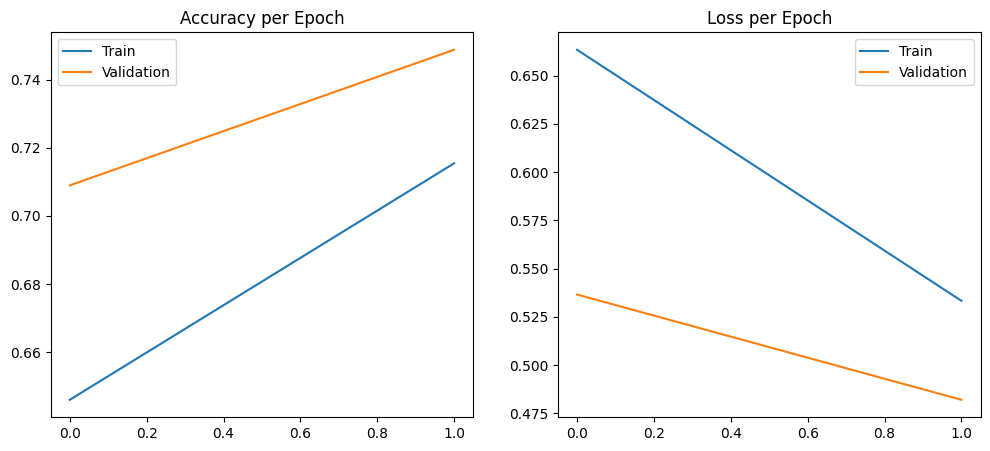

Found 410 images belonging to 2 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'next'

In [3]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Download dataset
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)

# GPU check
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('✅ GPU is Available!')
else:
    print('⚠️ GPU is Unavailable!')

# Paths
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/test')

# Class info
classes = os.listdir(train_dir)
num_classes = len(classes)
print(f'Number of Classes: {num_classes}\nClasses: {classes}')

# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=2
)

# ✅ Show training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss per Epoch')
plt.legend()

plt.show()

# ✅ Test prediction
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=True,
    class_mode='categorical'
)

# Predict and visualize
class_labels = list(test_data.class_indices.keys())

for i in range(5):
    img, label = test_data.next()
    prediction = model.predict(img)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.imshow(img[0])
    plt.title(f'Predicted: {predicted_class}\nActual: {class_labels[np.argmax(label)]}')
    plt.axis('off')
    plt.show()
